# Discrete Time Model Simulating Breast Cancer States

## Introduction

In [2]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [56]:
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],
              [0, 0.986, 0.005, 0.004, 0.005], 
              [0, 0, 0.992, 0.003, 0.005],
              [0, 0, 0, 0.991, 0.009],
              [0, 0, 0, 0, 1]])

max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)

# Run until max_state is reached for all individuals
while np.min(women_states) < max_state:
    
    # Make temporary vector with women's states
    new_women_states = women_states
    
    # Update states
    for i in range(1, int(np.max(women_states)) + 1):
        index_state = np.where(women_states == i)[0]
        new_women_states[index_state] = np.random.choice(states, size = len(index_state), p = P[i-1,:])
    women_states = new_women_states
    
    # Update liftime
    index_lifetime = np.where(women_states < max_state)[0]
    lifetime[index_lifetime] += 1
    
    #print("State:\t\t", women_states, )
    #print("Lifetime:\t",lifetime)
    #print("\n")

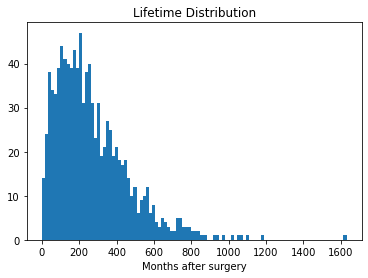

In [67]:
# Plot histogram of lifetime
plt.figure()
plt.hist(lifetime, bins = 100)
plt.title("Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.ylabel("")
plt.show()